In [24]:
%reload_ext autoreload
%autoreload 2

from pncbf.config import Arguments
from pncbf.renderer import NotebookRenderer
from pncbf.policy import Policy
from pncbf.env import Environment

import numpy as np
import matplotlib.pyplot as plt

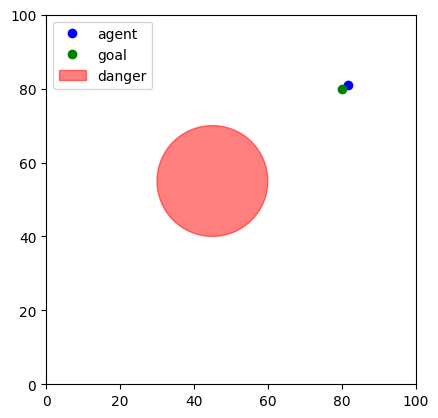

In [39]:
args = Arguments()
args.max_agent_vel = 2
args.world_size = [0, 100]

policy = Policy()
env = Environment(args, policy)
r = NotebookRenderer(xlim=env.world_size, enable_legend=True)

for i in range(100):
    state, info = env.step()
    
    r.set_data("agent", *state.agent_pos, fmt="ob", label="agent")
    r.set_data("goal", *state.goal_pos, fmt="og", label="goal")
    
    danger_patch = plt.Circle(state.danger_pos, state.danger_radius, color="r", alpha=0.5, label="danger")
    r.set_patch("danger", danger_patch)
    r.draw()